In [1]:
#import numpy as np
import torch
from typing import Tuple, List, Optional

In [2]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [7]:
import os 
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from datautils.datagen_temporal import _generate_DGP, _generate_U, GTMatrices          # noqa: E402

In [4]:
t = 50
r = 9
m = 25

In [5]:
#vcovsU, V = _generate_DGP(t = t, m = m, r = r, kernel= 'matern', vtype='random')

In [ ]:
vcovsU, V = _generate_DGP(t = t, m = m, r = r, kernel= 'cauchy', vtype='random')

In [ ]:
gtm = GTMatrices(1, t, m, r, 
           realizations = 1, 
           U_only=True)
gtm[0]

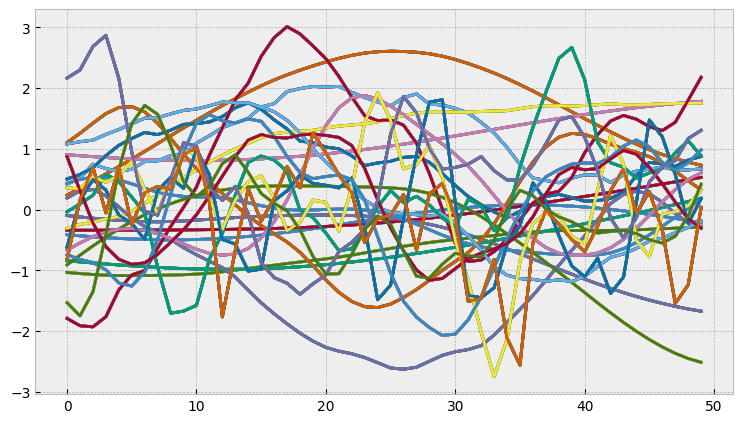

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
for col in range(r):
    ax.plot(gtm[0], label='U_{}'.format(col))
    #ax.legend()
plt.show()

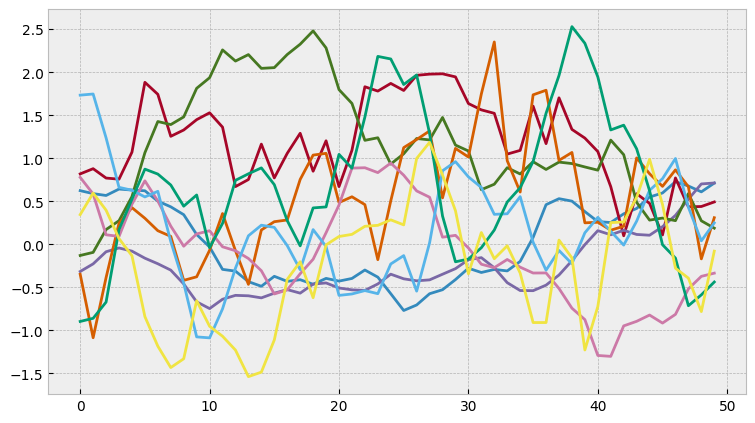

In [7]:
U = _generate_U(vcovsU)
# Plot each column as a line graph
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
for col in range(r):
    ax.plot(U[:, col], label='U_{}'.format(col))
    #ax.legend()
plt.show()

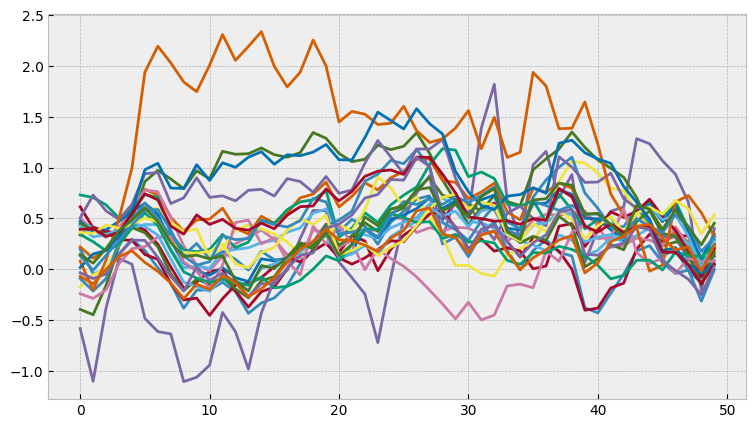

In [8]:
M = U @ V.T

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
for col in range(m):
    ax.plot(M[:, col])
plt.show()

In [12]:
import torch.nn as nn

In [ ]:
class RandomLinearHead(nn.Module):
    def __init__(self, in_dim: int, out_dim: int):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.mlp = nn.Sequential(
            nn.Linear(self.in_dim, 2*self.in_dim, bias = True),
            nn.SiLU(),
            nn.Linear(2*self.in_dim, self.out_dim, bias = False)
        ) 
        self.tanh = nn.Tanh()

    def forward(self, x):
        return self.tanh(self.mlp(x))

In [ ]:
def mlp_apply(x: torch.Tensor, random_mlp: RandomLinearHead) -> torch.Tensor:
    return random_mlp(x)  

In [ ]:
random_mlp = RandomLinearHead(m, 1)
random_mlp(torch.randn(m))
testdata = torch.randn(3, t, m)
vectorized_mlp = torch.vmap(mlp_apply, in_dims = (0, None))
vectorized_mlp(testdata, random_mlp).shape

torch.Size([3, 50, 1])

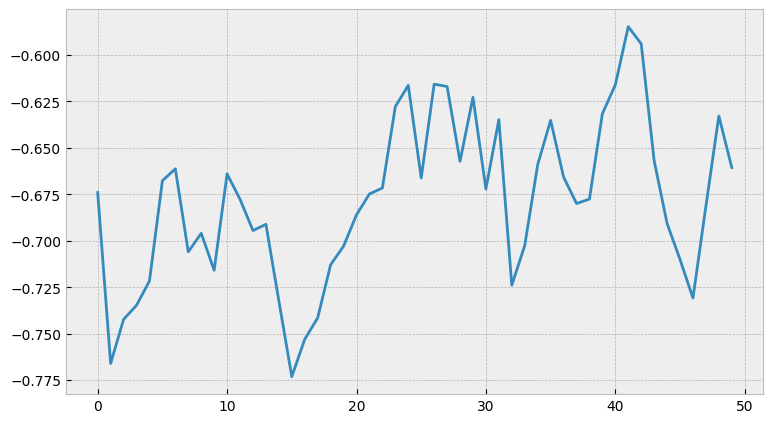

In [92]:


fig, ax = plt.subplots(1, 1, figsize=(9, 5))
plt.plot(vectorized_mlp(M, random_mlp).detach())
plt.show()

In [9]:
# assume each column is a price time series -- compute returns
def fin_return(val_start, val_end):
    return (val_end - val_start) / val_start

# generate a new matrix of returns with one fewer row than M
M_rets = fin_return(M[:-1, :], M[1:, :])

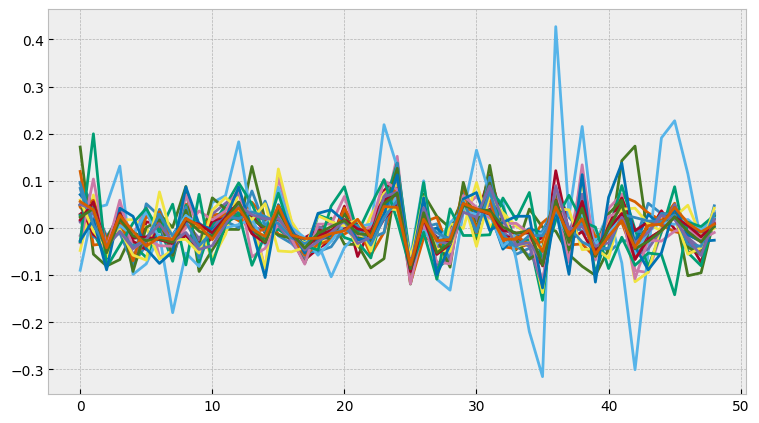

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
for col in range(m):
    ax.plot(M_rets[:, col])
plt.show()

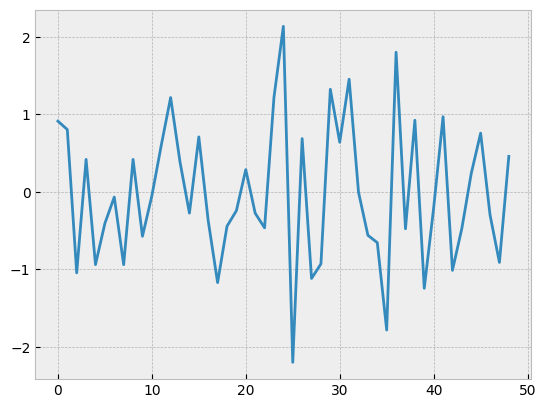

In [11]:
plt.plot(M_rets.sum(dim = 1))

In [ ]:
t = 30
r = 9
m = 15
realizations = 10

vcovsU, V = _generate_DGP(t = t, m = m, r = r, kernel='cauchy', vtype='random')
Us = torch.zeros((realizations, t, r))
for i in range(realizations):
    Us[i] = _generate_U(vcovsU)
Us.shape

torch.Size([10, 30, 9])

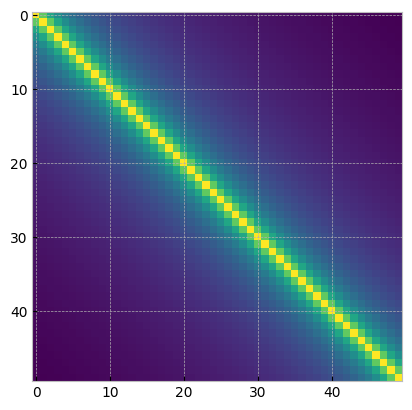

In [ ]:
plt.imshow(vcovsU[2])